In [1]:
cd ../../

/mnt/sda/otani/Experiments/hidden-challenges-MR


In [2]:
from src import settings
from tqdm import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.toolbox.eval import evaluate, accumulate_metrics
from src.toolbox.utils import _nms
from src.toolbox.visualization import plot_performance_per_duration
from src.toolbox.data_converters import ActivityNetCap2Instances
import seaborn as sns
import pickle as pkl
import json
import neptune
sns.set_style("white")

In [3]:
# load ground truth test set
raw_data = json.load(open("data/raw/activitynet/val_2.json"))
test_data = ActivityNetCap2Instances(raw_data)

In [4]:
project = neptune.init("mayu-ot/moment-retrieval")
exp_id = "MOM-10"
if not os.path.exists(f"tmp/{exp_id}/{exp_id}76.json"):
    exps = project.get_experiments(id=exp_id)
    print("downloading results ...")
    exps[0].download_artifact(f"{exp_id}76.json", f"tmp/{exp_id}")
    print("done!")
    
exp_id = "MOM-9"
if not os.path.exists(f"tmp/{exp_id}/{exp_id}76.shuffle.json"):
    exps = project.get_experiments(id=exp_id)
    print("downloading results ...")
    exps[0].download_artifact(f"{exp_id}76.shuffle.json", f"tmp/{exp_id}")
    print("done!")

In [5]:
def get_duration(video_id):
    for x in test_data:
        if x[0][0] == video_id:
            return x[1][-1]

def postproc_prediction(predictions):
    preds = []
    for p in tqdm(predictions, desc="postproc"):
        query = (p[0], p[2])
        video_duration = get_duration(query[0])
        seg = [s + [video_duration] for s in p[3][:5]]
        preds.append((query, seg, p[5][:5]))
    return preds

def eval_preds(pred_file, data):
    print(f"loading prediction file {pred_file}")
    predictions = json.load(open(pred_file))
    preds = postproc_prediction(predictions)
    results = evaluate(data, preds)
    summary = accumulate_metrics(results)
    return results, summary

results, summary = eval_preds("tmp/MOM-10/MOM-1076.json", test_data)
randomized_results, randomized_summary = eval_preds("tmp/MOM-9/MOM-976.shuffle.json", test_data)

loading prediction file tmp/MOM-10/MOM-1076.json


evaluating:   1%|          | 147/17031 [00:00<00:30, 545.42it/s]

151 missing instances
missing item: ('v_uqiMw7tQ1Cc', ' One man is holding onto a rope attached to a machine, and the other man instructs him to bend down on his left knee while still holding onto the rope and he showing the man how to have proper form.')
missing item: ('v_5qsXmDi8d74', 'The two sumo men are in the sumo ring with the referee in the middle of them off to the side and they begin to wrestle one another trying to push each other out of the ring while the referee runs from side to side to monitor the situations.')
missing item: ('v_5qsXmDi8d74', ' Eventually the taller sumo pushes the smaller guy out of the ring and they fall a little into the audience but both remain on their feet and go back onto the ring to catch their breaths and have the referee announce the winner.')


evaluating:   3%|▎         | 536/17031 [00:00<00:20, 823.30it/s]

missing item: ('v_koEfnIoZB_4', '  A person wearing a bungee jumping harness and attached to a long rope jumps from the ledge of a stone tunnel and falls many feet below to just above the ground where they bounce around on the extended cord.')
missing item: ('v_ShKrNPaSdhY', "A group of young adults are shown and they're in a large and very messy bedroom sitting on four bunkbeds along the walls, and the camera person grabs something for a  large wooden shelf.")
missing item: ('v_O_fdvOxYqiY', "There's a man in a gray shirt and black hat sitting on a stool in his living room with a set of banjo drums in front of him and a couch behind him that some more music instruments on it.")
missing item: ('v_2q_4I3ae0J4', 'A guy is hitting a ball with a stick and the action is being played in many different video speeds and angles to really catch the full view of how good he hit the ball.')
missing item: ('v_UfjR8ewF8xo', 'A person demonstrates what hash marks on a basketball court are as well as 

evaluating:   6%|▌         | 1055/17031 [00:01<00:16, 998.20it/s]

missing item: ('v_mFWRIp164r4', ' A man in a red turban has his left hand up, the men suddenly starts pulling on the ropes and the man in the red turban quickly puts his left arm down and they all continue to tug on the rope some more while the audience gets excited and starts moving about, clapping and yelling.')
missing item: ('v_qHRCGBIiNFg', '  The two men put gloves on and go into the hole to try to retrieve, then they use a wire, and then finally, they are able to wrangle a wriggling, large and long fish out of the water from under the ice.')


evaluating:   9%|▊         | 1462/17031 [00:01<00:16, 958.98it/s]

missing item: ('v_HCntSYltlmA', " 45 yards appears on the screen briefly and then a deer runs when someone shoots an arrow towards it and they replay the incident once again showing who did it and when they've killed one, a man goes near pulling the antlers and smiling.")
missing item: ('v_odMI0DGsn7k', 'A man wearing a blue sweater and glasses standing in a hallway talking to the camera appears in between various videos and screen shots of the fencing, the group of people around the fencing and the activities in the fencing area.')


evaluating:  11%|█         | 1805/17031 [00:01<00:14, 1070.81it/s]

missing item: ('v_gIhVeU8xbrs', 'In an enclosed weight lifting gym a large man wearing a red shirt and black shorts picks up a barbell with very heavy weights on each end, holds it briefly above his head and then quickly drops it to the ground as it bounces a few times.')
missing item: ('v_gIhVeU8xbrs', 'Another man wearing black shorts and a red and white shirt is also taking his turn at lifting the heavyweights on the barbell, then briefly over his head then drops them to the ground and does this four times in a row.')
missing item: ('v_7J6cZ_Gz8q4', 'A man in a black suit and a woman in a white gown dance in front of a room filled with people eating dinner, on a platform with fireworks, smoke and a live saxophone player playing music in a white suit and hat.')
missing item: ('v_KoqE2gPCLe4', "When the jump is completed,the lady grabs her sticks and waits to see her score but it doesn't show so she begins to make hand gestures to someone to ensure that the jump was successful.")
miss

evaluating:  12%|█▏        | 2120/17031 [00:02<00:15, 979.97it/s] 

missing item: ('v_pznmOdbp7E0', ' After mixing the cake ingredients she pour it on a glass bowl and put it inside the oven, bake it and insert a toothpick in the middle and inspect it and pull out the cake.')


evaluating:  15%|█▍        | 2542/17031 [00:02<00:15, 943.46it/s]

missing item: ('v_GMHzZXAQzIA', ' Then the child gradually moves to another bar on the monkey bars by herself and when she gets to the end she steps on the wooden end and then makes her way back to the beginning.')
missing item: ('v_4QvpJ71d8Nk', "Various clips of them begin to play as the scene rotates from them jumping in the indoor gymnasium and also in a darker area that has spotlights on the ground and they're wearing different outfits.")


evaluating:  17%|█▋        | 2979/17031 [00:03<00:15, 902.91it/s] 

missing item: ('v_9dSOQrpovQI', "The intro states Marissa's first attempt at washing dishes by herself and then we see a little girl with brown hair and a pink shirt washing the dishes at the sink, she turns to look at the camera and then back to the sink.")
missing item: ('v_lFlQ_xWVt8M', 'The man then puts his mask on, the screen goes black and a very hot flame that is blue,white and green appear and is moving, while a blue CEV logo is at the bottom right of the screen.')
missing item: ('v_sPSfixKrDc0', 'The man is back at the large light gray counter and in a sped up motion the man is shown with various different supplies as he assembles a very large truck cake that was previously shown.')
missing item: ('v_SqEHpHNuy-w', 'Two military men wearing glasses are leaned over a cot smiling, talking, and looking like they are getting ready to arm wrestle while a few people around them are watching,filming them or doing their own thing.')
missing item: ('v_SqEHpHNuy-w', "They struggle for a

evaluating:  19%|█▉        | 3263/17031 [00:03<00:15, 916.01it/s]

missing item: ('v_NGk3v4sKqdg', 'The video changes from color then eventually to black and white as people are working on different bikes and doing different things as people around them help or just watch, and sometimes children are shown watching them fix the bikes.')
missing item: ('v_q0KrlywYHM8', '  There is a video shown of a water polo match and at the bottom of the screen is a small dvd graphic as well as an orange colored bar with white text and below it a blue colored bar with white text.')
missing item: ('v_q0KrlywYHM8', '  A graphic screen appears with a crest with to orange bars on it, the larger bar has blue letters and the smaller bar has white, there is also a website address below the logo then the screen turns black.')
missing item: ('v_ATk8OkvNHHQ', 'From the view point of a rider, boys are riding around a track and suddenly a rider in front loses their balance and the rider falls off their bike and the camera man just rides on by avoiding hitting the fallen rider an

evaluating:  23%|██▎       | 3900/17031 [00:04<00:13, 944.57it/s] 

missing item: ('v__3xMhj4mbsk', ' There is a worn table shown, then a woman proceeds to paint the table with green paint while music plays, then he table is shown finished and then another coat is added on top.')
missing item: ('v_gd7SO0TQ-sY', '  A group of women play volley ball on the beach with a raised white net followed by another game of volleyball with a mixed gender game this time, before a final shot of a person surfing displays along with video of the two women playing volleyball without a net.')
missing item: ('v_PDjtB578yRk', 'Now two brown men who were crouched down in front of the adults playing instrument stand up and they do a dance that include both of them holding onto long bladed knives while everyone around them continues to watch.')
missing item: ('v_PDjtB578yRk', ' A white skin man enters and does his knife routine with one of the brown men as the other one leaves, and they continue switching out and taking turns with this double knife dance with only two of them

evaluating:  25%|██▍       | 4209/17031 [00:04<00:13, 943.41it/s]

missing item: ('v_B5Ea3Bs8hC4', "A man is talking and sitting on a chair and is washing clothes in a pink bucket that's filled with soap and water and surrounded by other colorful buckets with clothes in them as well as clothes on the grass.")
missing item: ('v_B5Ea3Bs8hC4', ' The man takes the dark piece of clothing and wrings it out in the pink bucket, then puts it in the yellow bucket for a few dunks in it, wrings it out in both the yellow and pink bucket then throws it into a dark green bucket.')
missing item: ('v_B5Ea3Bs8hC4', ' The man goes back to the pink bucket to wash another dark item clothing, he wrings it out in the pink bucket, throws it in the yellow bucket, then wrings his hands together a few times while staring at the camera.')
missing item: ('v_QoTM5tmcJeI', " The child that wasn't originally playing in the first place tries to take the place of the girl and she bumps him out of her way with her hip, then puts the ball back on the table.")
missing item: ('v_jed5hUKCC

evaluating:  27%|██▋       | 4665/17031 [00:04<00:11, 1059.22it/s]

missing item: ('v_lOCw2uO3UK8', 'A young man does warm up exercises before playing a solo game of tennis in a gym room using the wall as an opponent before finally collapsing on the gym floor in exhaustion and then rising again.')
missing item: ('v_-l18hJp8ShE', 'A close up of a blonde curly haired boy is shown, then an aerial shot from above that includes a very large dirt track and the words on the bottom right of the screen say "CHANEY RANCH MOTORCROSS CALIFORNIA,USA".')
missing item: ('v_-l18hJp8ShE', "A drone is shown as the boy takes off on his dirt bike and multiple various clips of the boy riding his bike play as he's going around the track very fast, or jumping with his bike and the drone can be seen in the sky.")
missing item: ('v_8YKUwWUU-O0', 'A large group of people are on a grassy field watching as two teams play tug o war, some people are taking pictures and videos a referee is in the middle of the rope to guide them, and each team has a coach(es) on the side of them tal

evaluating:  29%|██▉       | 4995/17031 [00:05<00:12, 973.00it/s] 

missing item: ('v_uM3RiCL0g2U', '  A man holding an array of white frisbees in his hand talks to a camera  The camera pans out and a dog is seen in the background with a frisbee in its mouth.')
missing item: ('v_pUIicfDCZC0', " He seasons chicken breast and puts them into the oven and then puts vegetables into the pot along with vegetables and more seasoning, there's also pasta on the other side and he cuts chicken up into little pieces and he mixes everything together creating a nice meal.")
missing item: ('v_XYW6F_4qKJU', 'An intro screen appears on a black screen that look like a white square that has yellow and blue drawings on it and words on the screen put together say "VI DO VET TAGLIARE LE UNGHIE AL GATTO".')
missing item: ('v_BLamvR0GIE8', 'A man talks to the camera and walks the audience into the bathroom where he proceeds to wash his hand while talking to the camera and eventually leaves the bathroom and walks back down the hall.')


evaluating:  32%|███▏      | 5482/17031 [00:05<00:11, 1044.10it/s]

missing item: ('v_mZ1Di2gg-I4', "The woman slowly lifts her left leg all the way up to her head level,squats to the ground slowly with her leg still pointing up then stands up and never loses her balance when she's balancing on just one foot and she continues to do her routine until the finish.")
missing item: ('v_38ZxXyECPPU', '  A man is showing a capoeria sequence while there is white text at the top corner of the screen as well as breaks with a black screen highlighting for steps when the sequence changes, and other hints for training.')
missing item: ('v_RhEunVjB_Ns', 'A large group of high school cheerleaders in a large indoor gym are in two different groups on the left and right and they immediately begin their cheer routine that includes flips and cheers that are mostly in unison.')
missing item: ('v_RhEunVjB_Ns', ' The girls separate into three groups and they hold one girl up above them while she poses, then the girl flips down into the group and they safely put them on the g

evaluating:  36%|███▌      | 6156/17031 [00:06<00:10, 1042.22it/s]

missing item: ('v_a4-5QFOiAiw', " The man throws the ball up again in the air and hits it very hard and does that three times until the words on the top of the screen spin away in a special effect as if it's spinning out into the distance of the video until it fades to black.")


evaluating:  39%|███▊      | 6586/17031 [00:06<00:11, 932.46it/s] 

missing item: ('v_r8AXq1Q5bn0', '  The man begins playing an accordion and dancing while playing as an onlooker in the background smiles and dances too before leaving the room,  The man continues to pay the accordion while singing and dancing.')
missing item: ('v_x4c_wI6kQyE', ' When the young smoker is done with his cigarette smoking he is shown with a tired look lying in his bed, reaching for his bottle of milk, then he lays down and drinks it.')
missing item: ('v_81dGQTVec_s', ' A pair of shoes is put in very dirty sink, after lifting and showing each shoes, a series of cleaning procedure are done in each shoes, these includes brushing the sides with a small brush and toothbrush with liquid solution and then wiping them with a cloth,  cleaning those small and hard to reach area with a unknown cleaner using cotton swabs and finally cleaning the sole and rinsing it using tap water.')
missing item: ('v_81dGQTVec_s', ' The shoes are dried in a concrete near a grassy area, lift for a whi

evaluating:  41%|████      | 6913/17031 [00:07<00:10, 948.72it/s]

missing item: ('v_lCX7y_KAihU', ' "Kevin raised £85" is shown on a black screen.')
missing item: ('v_ejIEsnkvLWY', 'Two men play accordions outdoors in the grass and in different locations throughout the video clip, at one point one of the players falls into a body of water and comes up with a fish in his shirt before everyone toasts at a table outdoors.')
missing item: ('v_1NAlbF88oUI', 'People are in a room focusing on two men dressed in orange shirts who are positioning themselves on opposite sides of a table to begin an arm wrestling match while two referees are at the ends of the table.')
missing item: ('v_1NAlbF88oUI', "The referees check their positions and one of them gives a thumbs up, the men begin their arm wrestling match where they don't struggle too much and the man on the right easily wins the match.")
missing item: ('v_9VRLj4IfUzY', '  The woman begins applying the white wax like substance to the cabinets she is sitting next to and then blots them with a piece of fabric

evaluating:  45%|████▌     | 7709/17031 [00:07<00:08, 1150.59it/s]

missing item: ('v_hXSee4C6pyE', '  A series of metal clamps are shown before A bicycle with gold spikes and a black white walled tire is shown without a chain, as a hand begins to apply one to the bicycle.')
missing item: ('v_7DJDUzdw_I4', ' The man finishes his routine strong with multiple flips in the air, lands on his feet, raises his two arms on the sides, claps and then walks away as two men are walking towards him.')
missing item: ('v_DRSH-_Ye9eE', 'The boy quickly gets up and the boy who knocked the other boy down runs to the ball and picks up with his net at the end of the stick and starts running towards the goal while the referee runs with him.')
missing item: ('v_DRSH-_Ye9eE', ' When the boy gets to the goal area he tosses the ball to another player and that player attempts to throw it into the goal and the players continue to look for the ball.')


evaluating:  47%|████▋     | 8073/17031 [00:08<00:07, 1158.58it/s]

missing item: ('v_HkzMA1jrm00', ' The man wearing the red jacket talks to the man wearing the eye patch, he sits down and they begin a game at the table while other people look on as they play and the dealer talks with them.')
missing item: ('v_woUdHiRWKMg', 'A red car is shown and then the interior with a man lifting the emergency brake, then he is shown placing a rock under the tire and flipping through the car manual and the camera zooms in on the trunk drawing.')
missing item: ('v_cY541XSdz50', ' A group of people strap a man into bungee jumping gear before the man jumps, backwards, into the air and falls a great distance below a raised bridge and bounces at the end of a bungee rope.')


evaluating:  51%|█████     | 8631/17031 [00:08<00:08, 1036.11it/s]

missing item: ('v_eVTMUEYhwDE', '  The man then lifts the barbell above his head before changing leg stance to better support the weight and finally allowing the bell to drop to the floor from the height of his head and bounce as helpers rush the stage to get the bell.')
missing item: ('v_JDg--pjY5gg', '  A man in a red and black shirts talks to the camera in a close up shot before the scene cuts away to a room filled with people playing or watching people plat beer pong.')
missing item: ('v_TfpCjzGqA7w', 'little girl is in backyard holding a pole and hiting a piñata.')
missing item: ('v_TfpCjzGqA7w', ' man is standing next to a house in front of the piñata.')
missing item: ('v_W1FmiUTYt3I', ' Then both the man and the boy are in the window again, and they are talking about washing hands and wipes, the video flashes back to all the things the boy does with his hands and back to the window.')


evaluating:  52%|█████▏    | 8858/17031 [00:08<00:07, 1082.24it/s]

missing item: ('v_470dhR3Yrjs', ' Indoors this girl shows the back of her head as she gives a tutorial on how to braid the hair as she begins with the top of hear head and finishes at the nape of her neck.')


evaluating:  55%|█████▍    | 9284/17031 [00:09<00:08, 960.58it/s] 

missing item: ('v_iwhejKH3DSw', 'The person then grabs the large clear measuring cup that has mayonnaise in it and they spoon it on top of the vegetables and they mix it all together with the spoon until the vegetables are completely covered, then they spoon the rest of the mayonnaise into the bowl that was left in the measuring cup.')
missing item: ('v_iwhejKH3DSw', 'The person takes some liquid and pours two teaspoons into the mixture, then takes a tablespoon and pours two tablespoons of olive oil, adds some salt and pepper, then mixes the mixture with the spoon.')
missing item: ('v_7LimgSQsHm0', ' Video clips of hockey players on a rink and people in the stands begin to play while words are still scrolling on the bottom, and at times a man is shown talking to the camera with blue words on the bottom that say "AMATEUR ICE HOCKEY LEAGUE CROWNED WITH GALA GAME AGAINST PAST LEGENDS".')
missing item: ('v_7LimgSQsHm0', 'More clips of people playing hockey on a rink and a man holding a mic

evaluating:  58%|█████▊    | 9812/17031 [00:09<00:07, 914.19it/s] 

missing item: ('v_IN4nGNF9gi8', "When he's finished the woman shakes her head back and forth, walks from the chair, leaves the business through the glass doors, goes to the camera for a close up shot then walks away from the camera.")


evaluating:  60%|█████▉    | 10217/17031 [00:10<00:07, 900.46it/s]

missing item: ('v_9KPRS9y8Fvo', 'A man and a baby are at a park and each are swinging on their own swings with words at the bottom right of the screen that read "Edwin\'s First Big Swing Five-and-a-half months May 18, 2012".')
missing item: ('v_41__Qick6tM', "The woman is still sitting on the chair, hair now unbraided, talking, and she briefly holds a product in her hand, puts it down then grabs her hair and starts to demonstrate how to braid while white words appear on the bottom that are describing the steps that she's taking as she slowly braids her hair.")
missing item: ('v_41__Qick6tM', 'When she gets to the end of the braid she holds her hair with one hand, grabs a rubber band, ties the rubber band at the end of the hair while white words at the bottom continue to appear describing each step.')
missing item: ('v_41__Qick6tM', 'The outro appears with a white screen with black words that say MARC ANTHONY, a website and white words on a gray banner at the bottom that say FISHTAIL/FI

evaluating:  64%|██████▍   | 10937/17031 [00:11<00:06, 992.08it/s] 

missing item: ('v_SvDnZ47J37U', ' dog is running in a field and sits on the court, the dog lay down on the court and a woman grab it from the floor and gives him to a man to take him out the field.')
missing item: ('v_sMITf5WBIxM', '    A hairdresser talks to the camera before beginning to wash a customers hair who is sitting in a beauty parlor chair and then at a sink while the hair is being washed.')


evaluating:  66%|██████▌   | 11268/17031 [00:11<00:05, 1008.96it/s]

missing item: ('v_c7HroaL0WDc', ' A man is now standing in front of the speedboat, talking, and the words on the screen say his name is Trevor Hansen and under his name there are words that say Team Supra Rider, and various clips of the speedboat both out and in it are shown while the man talks and sometimes shows what the interior can do.')


evaluating:  68%|██████▊   | 11591/17031 [00:11<00:05, 1015.82it/s]

missing item: ('v_SnZnAVuMn4M', '  The coach then returns to talk to the camera and makes hand gestures toward the ball after which the clips go in and out of showing the women play volleyball and the man talking.')
missing item: ('v_ksKlcjeIBi0', 'Young gymnasts are at a gym practicing on balancing beams.')
missing item: ('v_ksKlcjeIBi0', ' A girl in camouflage leaps, turns and lands back on the balancing beam.')
missing item: ('v_ksKlcjeIBi0', '  She hops again and poses.')


evaluating:  70%|███████   | 11926/17031 [00:12<00:05, 986.22it/s] 

missing item: ('v_TNFoUBRsngY', '  Someone yells go and the teams pull on the rope as the team in the white wins the match and they run towards the middle of the field and are met with others in white shirts and they celebrate the win.')
missing item: ('v_TNFoUBRsngY', '  The teams pull on the rope as the team in white wins the match and again they walk to the middle of the field and are met by other children in white shirts and they all celebrate.')
missing item: ('v_mKm75VWThAI', "The men bang into one another, one falls, and they continue to wrestle and knock each other onto the ground multiple times, taking turns kicking each other, and people not in sumo outfits join in and jump on the sumo's backs as well.")
missing item: ('v_mKm75VWThAI', 'A black screen appears with large white letters that read "Sumo Suit Finals", a man with a microphone is talking, a referee is walking around the area, and the man is introducing the sumo wrestlers and the referee.')
missing item: ('v_mKm75VWT

evaluating:  72%|███████▏  | 12338/17031 [00:12<00:04, 1002.99it/s]

missing item: ('v_8XxsgEw49p0', 'A video of a painter and his son as the painter is asked questions on painting techniques and his son demonstrates how to do them on a canvas while in the corner of the screen a digital paint program is being shown from a computer screen.')
missing item: ('v_1UIathRb404', 'An athletic young man wearing athletic gear is standing outdoors, white words on the bottom left say "The Hit", and with a curved stick in his hands he hits a white ball very hard across the field and does this a few times at different angles and a view shows that he hits it into a goal.')
missing item: ('v_1UIathRb404', 'Four young men are shown standing on the field with their sticks standing along their sides and the text on the upper right say "STICK LENGTH", and multiple white words are on the right side.')
missing item: ('v_1UIathRb404', "The young men take turns demonstrating various moves and white text appears on the upper left to say what they're doing, as well as a lot of w

evaluating:  75%|███████▍  | 12700/17031 [00:12<00:03, 1130.64it/s]

missing item: ('v_3f6G-qzwzfg', 'Two teams of cricket players play in a ODI game in front of a large audience in the bleachers with high lights shown when goals achieve with the green and yellow team celebrating the most throughout the video.')
missing item: ('v_TGvY7GtyTK4', 'The man then puts his two hands on the ground, and pushes his feet back to go back on his knees and demonstrates one more time how he jumps from his knees to his toes.')
missing item: ('v_x0PE_98UO3s', 'Although her hand hands are going down,the right one is still in at an angle and the left one is fully extended while holding the bow and a still image is captured of her technique.')


evaluating:  77%|███████▋  | 13144/17031 [00:13<00:03, 1034.94it/s]

missing item: ('v_6vylz7u_tHw', " The working man walks over to the older man's camel, pulls his rope up, instructs the elderly man how to sit on the camel, and the camel stands up while the older man also holds on tight while smiling.")
missing item: ('v_6vylz7u_tHw', " A child walks up to the worker and the man holds the rope out to the child, the child grabs the rope and walks the camel's with the working man walking closely behind him holding a stick.")
missing item: ('v_ZhUC4qTGdHY', ' We see a man water skiing behind the man on the jet ski n the lake The two men walk on the shore then speak to the camera before driving away in the truck.')
missing item: ('v_0ZXc2fEDgg8', ' A man is holding a man on his shoulders in front of him outside near a small fence and trees and the standing man slams the man on another man laying on the ground.')


evaluating:  80%|███████▉  | 13549/17031 [00:13<00:03, 916.08it/s] 

missing item: ('v_zwa44U585FE', 'Two men are standing and talking in a yard holding onto croquet sticks and balls on the ground and white words appear at the bottom of the screen that say "How to play croquet with Mr Ben Sutton on Sea, summer 1990".')


evaluating:  82%|████████▏ | 13906/17031 [00:13<00:03, 981.19it/s]

missing item: ('v_kuv1yEeNQzQ', "The black screen with the same colorful logos briefly appear again and it's followed by more clips of people playing soccer in the sand making goals after goals while people cheer them on, and the winners cheer themselves on.")
missing item: ('v_6pnabYJdqxc', " A man is now standing and talking in the field of flowers and the words on the bottom screen say his name is Skip Richter and he's a Horticulturist and the website displays at the bottom in purple letters.")
missing item: ('v_6pnabYJdqxc', 'The man is now holding a floral plant up with his left hand and with his right hand he cuts the flowers off, continues to talk the whole time, and then holds up the flower less plant with his right hand.')
missing item: ('v_6pnabYJdqxc', 'More views of the flowers are shown and it ends with the man talking and him holding up a plant with flowers in his left hand, and plant without the flowers in his right hand.')


evaluating:  84%|████████▍ | 14289/17031 [00:14<00:02, 1141.51it/s]

missing item: ('v_VhzPqd0Su5I', 'A view of the grass is shown, then a close up of a hand, and finally a man is shown riding on a riding lawn mower in a very large grassy area surrounded by a lot of trees.')
missing item: ('v_DQLotF3P9Fc', ' The young man dressed in the blue shirt is practicing shot put in the field while the other man who is slightly older than him is in a green shirt giving him instructions on how to throw the ball.')
missing item: ('v_RjZ7jJBE1Qw', 'A different man and a toddler girl are now standing next to a pool and the man throws the toddler in and she struggles to swim and struggles catch her breath while floating on her back multiple times.')


evaluating:  87%|████████▋ | 14750/17031 [00:14<00:02, 934.77it/s] 

missing item: ('v_ZjvmWr5LoFw', '  The cars start moving again and the children continue to drive until the cars are stopped again and the worker returns to the floor among the children before the scene fades out and some of the kids get off of the bumper cars.')
missing item: ('v_EQPiYEvFmSo', ' Another set of cheerleaders on the other side of the room proceeds to shout a chant and cheer for the performers, giving them a round of applause while the performing team stands by the wall on the other side of the room.')
missing item: ('v_bZF4nakRNF4', 'An old black and white clip plays and a tall man starts running towards a pole that is up high, and there are a lot of people in the general area doing their own thing or watching him.')
missing item: ('v_bZF4nakRNF4', ' When the man reaches the pole he jumps very high, clears the pole, lands on the matting below it and people cheer while he gets up and runs back to the area he started.')
missing item: ('v_lZ6zN5Q447M', '  He uses a straw to

evaluating:  91%|█████████ | 15484/17031 [00:15<00:01, 1015.01it/s]

missing item: ('v_iJWmjVjBNzE', '  The video shows a sped up time of a family decorating a Christmas tree in a living room as the mount is placed and the tree is then decorated with lights  and ornaments as some of the family members show off and pose for the camera.')
missing item: ('v_q4Oy6EDTJiM', ' He notices that there is some poop at the bottom of the sink so he lifts the dog out of the sink and rinses the poop down the drain then places the dog back in the sink.')
missing item: ('v_dn1qrAHh7k0', 'bread slices, á provologne and butter are shown in a counter.')


evaluating:  94%|█████████▍| 16031/17031 [00:16<00:00, 1025.25it/s]

missing item: ('v_vS0ppdYTwTc', " Next she combs the hair and divides a part of the hair into three sections and she does a french braid in the middle of the head, which causes the client in the chair to smile when she's done.")
missing item: ('v_sc_L4zUEb7E', 'A woman is shown sitting on a tube and looks like the camera is handed to her and the view changes from her point of view and shows her point going down the hill and anything she looks at.')


evaluating:  95%|█████████▌| 16246/17031 [00:16<00:00, 1001.08it/s]

missing item: ('v_xs5imfBbWmw', '  Various clips are shown of people on yellow rafts rafting down a river  as a voice over on the film gives the specifics of this destination and activities and guests and clients are shown giving live opinions on the experience.')
missing item: ('v_KzogfJrOqJE', ' The woman then grabs the bucket of water and pours the water into the larger bucket, refills the bucket again and returns to the area, puts the bucket down and sits on the wooden stool.')
missing item: ('v_KzogfJrOqJE', 'The woman then wrings out the clothing item then sticks it into the smaller bucket and now the video is in a sepia tone color as she washes more clothing items, wrings them out and puts them into the smaller bucket until she has done all pieces of clothing includes the largest fabric they were all wrapped in.')
missing item: ('v_KzogfJrOqJE', ' When the woman is done hanging all the clothes the video goes back to color, the woman talks to the camera and a black screen appears

evaluating:  98%|█████████▊| 16775/17031 [00:16<00:00, 959.07it/s] 

missing item: ('v_o8ja3mhecQI', ' She jumps down again and pulls the hole grips of the resistance band around her legs then climbs back up on the pull up bar and uses the resistance bands as a bungee as she jumps down again.')
missing item: ('v_msd9vrplD-I', 'A playground is shown and leads into several clips of a boy playing on the playground.')
missing item: ('v_msd9vrplD-I', ' A man speaks to the camera and plays around with the boy.')
missing item: ('v_msd9vrplD-I', ' The boy moves all around the playground while the man records him and plays with him.')
missing item: ('v_krNVpENNPCM', " She then mixes the thin manageable mix in the bowl and puts it inside of a square baking pan to let it bake and when it's done, she takes the cake out to cut it into little slices.")


evaluating: 100%|██████████| 17031/17031 [00:17<00:00, 993.04it/s]

missing item: ('v_fDPNV463JuE', "Two men dressed in protective gear and helmets are standing closely to one another talking, and one of the men has a paint gun in his hands and he's showing how he holds the gun as he talks and points to the paint gun area with all of the large cushions.")
missing item: ('v_Qhs0AjFvcOA', ' A white screen appears and the Olympic logo is shown along with text for the year of that Olympics tournament followed by several screens with black text and a Youtube logo and the web address.')
missing item: ('v_gEYutYXODs4', ' the woman then sits in a living room and starts knitting.')
missing item: ('v_K5wPwCFVkhU', 'A dog is resting in a person lap.')
missing item: ('v_K5wPwCFVkhU', 'the dog is rubbing his head and licking the hand of the person holding him while laying and relaxing on a person lap.')
missing item: ('v_K5wPwCFVkhU', "finally the dog stops licking the person hand and try's to look at the camera.")
missing item: ('v_0vQs3ztG7vg', 'A small child wea

R@1 IoU>0.3 0.54
R@1 IoU>0.5 0.36
R@1 IoU>0.7 0.20
R@5 IoU>0.3 0.80
R@5 IoU>0.5 0.67
R@5 IoU>0.7 0.42
R@10 IoU>0.3 0.80
R@10 IoU>0.5 0.67
R@10 IoU>0.7 0.42
loading prediction file tmp/MOM-9/MOM-976.shuffle.json


evaluating:   1%|          | 120/17031 [00:00<00:35, 481.65it/s]

151 missing instances
missing item: ('v_uqiMw7tQ1Cc', ' One man is holding onto a rope attached to a machine, and the other man instructs him to bend down on his left knee while still holding onto the rope and he showing the man how to have proper form.')
missing item: ('v_5qsXmDi8d74', 'The two sumo men are in the sumo ring with the referee in the middle of them off to the side and they begin to wrestle one another trying to push each other out of the ring while the referee runs from side to side to monitor the situations.')
missing item: ('v_5qsXmDi8d74', ' Eventually the taller sumo pushes the smaller guy out of the ring and they fall a little into the audience but both remain on their feet and go back onto the ring to catch their breaths and have the referee announce the winner.')


evaluating:   3%|▎         | 468/17031 [00:00<00:22, 731.17it/s]

missing item: ('v_koEfnIoZB_4', '  A person wearing a bungee jumping harness and attached to a long rope jumps from the ledge of a stone tunnel and falls many feet below to just above the ground where they bounce around on the extended cord.')
missing item: ('v_ShKrNPaSdhY', "A group of young adults are shown and they're in a large and very messy bedroom sitting on four bunkbeds along the walls, and the camera person grabs something for a  large wooden shelf.")
missing item: ('v_O_fdvOxYqiY', "There's a man in a gray shirt and black hat sitting on a stool in his living room with a set of banjo drums in front of him and a couch behind him that some more music instruments on it.")
missing item: ('v_2q_4I3ae0J4', 'A guy is hitting a ball with a stick and the action is being played in many different video speeds and angles to really catch the full view of how good he hit the ball.')
missing item: ('v_UfjR8ewF8xo', 'A person demonstrates what hash marks on a basketball court are as well as 

evaluating:   4%|▍         | 733/17031 [00:00<00:20, 800.54it/s]

missing item: ('v_hL11sP4Hlrg', ' someone is adding nail polish to a sponge to create an ombreé paint.')
missing item: ('v_bfBTnUiGVUo', "A young boy dressed in shorts and a t-shirt is standing in a bathroom with his left foot on a colorful mat and his right hand on the sink, and he's brushing his teeth with his left hand.")


evaluating:   5%|▌         | 908/17031 [00:01<00:19, 819.02it/s]

missing item: ('v_mFWRIp164r4', ' A man in a red turban has his left hand up, the men suddenly starts pulling on the ropes and the man in the red turban quickly puts his left arm down and they all continue to tug on the rope some more while the audience gets excited and starts moving about, clapping and yelling.')
missing item: ('v_qHRCGBIiNFg', '  The two men put gloves on and go into the hole to try to retrieve, then they use a wire, and then finally, they are able to wrangle a wriggling, large and long fish out of the water from under the ice.')


evaluating:   8%|▊         | 1344/17031 [00:01<00:20, 772.73it/s]

missing item: ('v_HCntSYltlmA', " 45 yards appears on the screen briefly and then a deer runs when someone shoots an arrow towards it and they replay the incident once again showing who did it and when they've killed one, a man goes near pulling the antlers and smiling.")


evaluating:  10%|█         | 1758/17031 [00:02<00:15, 965.12it/s]

missing item: ('v_odMI0DGsn7k', 'A man wearing a blue sweater and glasses standing in a hallway talking to the camera appears in between various videos and screen shots of the fencing, the group of people around the fencing and the activities in the fencing area.')
missing item: ('v_gIhVeU8xbrs', 'In an enclosed weight lifting gym a large man wearing a red shirt and black shorts picks up a barbell with very heavy weights on each end, holds it briefly above his head and then quickly drops it to the ground as it bounces a few times.')
missing item: ('v_gIhVeU8xbrs', 'Another man wearing black shorts and a red and white shirt is also taking his turn at lifting the heavyweights on the barbell, then briefly over his head then drops them to the ground and does this four times in a row.')
missing item: ('v_7J6cZ_Gz8q4', 'A man in a black suit and a woman in a white gown dance in front of a room filled with people eating dinner, on a platform with fireworks, smoke and a live saxophone player p

evaluating:  12%|█▏        | 2037/17031 [00:02<00:17, 845.50it/s]

missing item: ('v_9ut_IDtfVzY', ' The camera pans to show several individuals in and near a building with a large number of bicycles and bicycle parts inside and outside, with many of them interacting with the bicycles and parts.')
missing item: ('v_pznmOdbp7E0', ' After mixing the cake ingredients she pour it on a glass bowl and put it inside the oven, bake it and insert a toothpick in the middle and inspect it and pull out the cake.')


evaluating:  15%|█▍        | 2529/17031 [00:03<00:17, 825.72it/s]

missing item: ('v_GMHzZXAQzIA', ' Then the child gradually moves to another bar on the monkey bars by herself and when she gets to the end she steps on the wooden end and then makes her way back to the beginning.')
missing item: ('v_4QvpJ71d8Nk', "Various clips of them begin to play as the scene rotates from them jumping in the indoor gymnasium and also in a darker area that has spotlights on the ground and they're wearing different outfits.")


evaluating:  17%|█▋        | 2848/17031 [00:03<00:18, 780.83it/s]

missing item: ('v_9dSOQrpovQI', "The intro states Marissa's first attempt at washing dishes by herself and then we see a little girl with brown hair and a pink shirt washing the dishes at the sink, she turns to look at the camera and then back to the sink.")
missing item: ('v_lFlQ_xWVt8M', 'The man then puts his mask on, the screen goes black and a very hot flame that is blue,white and green appear and is moving, while a blue CEV logo is at the bottom right of the screen.')


evaluating:  19%|█▊        | 3162/17031 [00:03<00:18, 740.62it/s]

missing item: ('v_sPSfixKrDc0', 'The man is back at the large light gray counter and in a sped up motion the man is shown with various different supplies as he assembles a very large truck cake that was previously shown.')
missing item: ('v_SqEHpHNuy-w', 'Two military men wearing glasses are leaned over a cot smiling, talking, and looking like they are getting ready to arm wrestle while a few people around them are watching,filming them or doing their own thing.')
missing item: ('v_SqEHpHNuy-w', "They struggle for a short while, and as soon as the guy on the right is using all his might the man on the left let's his fist go and the man on the left accidentally punches his own face and knocks his glasses off.")
missing item: ('v_NGk3v4sKqdg', 'The video changes from color then eventually to black and white as people are working on different bikes and doing different things as people around them help or just watch, and sometimes children are shown watching them fix the bikes.')
missing i

evaluating:  23%|██▎       | 3882/17031 [00:04<00:15, 841.60it/s]

missing item: ('v__3xMhj4mbsk', ' There is a worn table shown, then a woman proceeds to paint the table with green paint while music plays, then he table is shown finished and then another coat is added on top.')
missing item: ('v_gd7SO0TQ-sY', '  A group of women play volley ball on the beach with a raised white net followed by another game of volleyball with a mixed gender game this time, before a final shot of a person surfing displays along with video of the two women playing volleyball without a net.')
missing item: ('v_PDjtB578yRk', 'Now two brown men who were crouched down in front of the adults playing instrument stand up and they do a dance that include both of them holding onto long bladed knives while everyone around them continues to watch.')
missing item: ('v_PDjtB578yRk', ' A white skin man enters and does his knife routine with one of the brown men as the other one leaves, and they continue switching out and taking turns with this double knife dance with only two of them

evaluating:  24%|██▍       | 4160/17031 [00:05<00:15, 848.38it/s]

missing item: ('v_B5Ea3Bs8hC4', "A man is talking and sitting on a chair and is washing clothes in a pink bucket that's filled with soap and water and surrounded by other colorful buckets with clothes in them as well as clothes on the grass.")
missing item: ('v_B5Ea3Bs8hC4', ' The man takes the dark piece of clothing and wrings it out in the pink bucket, then puts it in the yellow bucket for a few dunks in it, wrings it out in both the yellow and pink bucket then throws it into a dark green bucket.')
missing item: ('v_B5Ea3Bs8hC4', ' The man goes back to the pink bucket to wash another dark item clothing, he wrings it out in the pink bucket, throws it in the yellow bucket, then wrings his hands together a few times while staring at the camera.')
missing item: ('v_QoTM5tmcJeI', " The child that wasn't originally playing in the first place tries to take the place of the girl and she bumps him out of her way with her hip, then puts the ball back on the table.")
missing item: ('v_jed5hUKCC

evaluating:  26%|██▌       | 4446/17031 [00:05<00:14, 866.78it/s]

missing item: ('v_6hu3V1PS4vM', 'While the videos are playing a smaller video of a woman talking plays in the bottom right of the screen and white words on the small screen say the woman is "Coach Cheryl Tyler Helix Field Hockey".')
missing item: ('v_lOCw2uO3UK8', 'A young man does warm up exercises before playing a solo game of tennis in a gym room using the wall as an opponent before finally collapsing on the gym floor in exhaustion and then rising again.')
missing item: ('v_-l18hJp8ShE', 'A close up of a blonde curly haired boy is shown, then an aerial shot from above that includes a very large dirt track and the words on the bottom right of the screen say "CHANEY RANCH MOTORCROSS CALIFORNIA,USA".')
missing item: ('v_-l18hJp8ShE', "A drone is shown as the boy takes off on his dirt bike and multiple various clips of the boy riding his bike play as he's going around the track very fast, or jumping with his bike and the drone can be seen in the sky.")


evaluating:  29%|██▊       | 4865/17031 [00:05<00:12, 936.74it/s]

missing item: ('v_8YKUwWUU-O0', 'A large group of people are on a grassy field watching as two teams play tug o war, some people are taking pictures and videos a referee is in the middle of the rope to guide them, and each team has a coach(es) on the side of them talking to them.')
missing item: ('v_uM3RiCL0g2U', '  A man holding an array of white frisbees in his hand talks to a camera  The camera pans out and a dog is seen in the background with a frisbee in its mouth.')
missing item: ('v_pUIicfDCZC0', " He seasons chicken breast and puts them into the oven and then puts vegetables into the pot along with vegetables and more seasoning, there's also pasta on the other side and he cuts chicken up into little pieces and he mixes everything together creating a nice meal.")
missing item: ('v_XYW6F_4qKJU', 'An intro screen appears on a black screen that look like a white square that has yellow and blue drawings on it and words on the screen put together say "VI DO VET TAGLIARE LE UNGHIE AL 

evaluating:  33%|███▎      | 5593/17031 [00:06<00:11, 969.02it/s]

missing item: ('v_mZ1Di2gg-I4', "The woman slowly lifts her left leg all the way up to her head level,squats to the ground slowly with her leg still pointing up then stands up and never loses her balance when she's balancing on just one foot and she continues to do her routine until the finish.")
missing item: ('v_38ZxXyECPPU', '  A man is showing a capoeria sequence while there is white text at the top corner of the screen as well as breaks with a black screen highlighting for steps when the sequence changes, and other hints for training.')
missing item: ('v_RhEunVjB_Ns', 'A large group of high school cheerleaders in a large indoor gym are in two different groups on the left and right and they immediately begin their cheer routine that includes flips and cheers that are mostly in unison.')
missing item: ('v_RhEunVjB_Ns', ' The girls separate into three groups and they hold one girl up above them while she poses, then the girl flips down into the group and they safely put them on the g

evaluating:  36%|███▋      | 6209/17031 [00:07<00:11, 905.13it/s]

missing item: ('v_a4-5QFOiAiw', " The man throws the ball up again in the air and hits it very hard and does that three times until the words on the top of the screen spin away in a special effect as if it's spinning out into the distance of the video until it fades to black.")


evaluating:  39%|███▉      | 6600/17031 [00:07<00:12, 812.22it/s]

missing item: ('v_r8AXq1Q5bn0', '  The man begins playing an accordion and dancing while playing as an onlooker in the background smiles and dances too before leaving the room,  The man continues to pay the accordion while singing and dancing.')
missing item: ('v_x4c_wI6kQyE', ' When the young smoker is done with his cigarette smoking he is shown with a tired look lying in his bed, reaching for his bottle of milk, then he lays down and drinks it.')
missing item: ('v_81dGQTVec_s', ' A pair of shoes is put in very dirty sink, after lifting and showing each shoes, a series of cleaning procedure are done in each shoes, these includes brushing the sides with a small brush and toothbrush with liquid solution and then wiping them with a cloth,  cleaning those small and hard to reach area with a unknown cleaner using cotton swabs and finally cleaning the sole and rinsing it using tap water.')
missing item: ('v_81dGQTVec_s', ' The shoes are dried in a concrete near a grassy area, lift for a whi

evaluating:  41%|████      | 6905/17031 [00:08<00:11, 882.70it/s]

missing item: ('v_ejIEsnkvLWY', 'Two men play accordions outdoors in the grass and in different locations throughout the video clip, at one point one of the players falls into a body of water and comes up with a fish in his shirt before everyone toasts at a table outdoors.')
missing item: ('v_1NAlbF88oUI', 'People are in a room focusing on two men dressed in orange shirts who are positioning themselves on opposite sides of a table to begin an arm wrestling match while two referees are at the ends of the table.')
missing item: ('v_1NAlbF88oUI', "The referees check their positions and one of them gives a thumbs up, the men begin their arm wrestling match where they don't struggle too much and the man on the right easily wins the match.")
missing item: ('v_9VRLj4IfUzY', '  The woman begins applying the white wax like substance to the cabinets she is sitting next to and then blots them with a piece of fabric, after which, she begins talking to the camera again.')
missing item: ('v_PjcTk1hc

evaluating:  45%|████▌     | 7670/17031 [00:08<00:09, 969.18it/s] 

missing item: ('v_hXSee4C6pyE', '  A series of metal clamps are shown before A bicycle with gold spikes and a black white walled tire is shown without a chain, as a hand begins to apply one to the bicycle.')
missing item: ('v_7DJDUzdw_I4', ' The man finishes his routine strong with multiple flips in the air, lands on his feet, raises his two arms on the sides, claps and then walks away as two men are walking towards him.')
missing item: ('v_DRSH-_Ye9eE', 'The boy quickly gets up and the boy who knocked the other boy down runs to the ball and picks up with his net at the end of the stick and starts running towards the goal while the referee runs with him.')
missing item: ('v_DRSH-_Ye9eE', ' When the boy gets to the goal area he tosses the ball to another player and that player attempts to throw it into the goal and the players continue to look for the ball.')


evaluating:  47%|████▋     | 7990/17031 [00:09<00:08, 1020.99it/s]

missing item: ('v_HkzMA1jrm00', ' The man wearing the red jacket talks to the man wearing the eye patch, he sits down and they begin a game at the table while other people look on as they play and the dealer talks with them.')
missing item: ('v_woUdHiRWKMg', 'A red car is shown and then the interior with a man lifting the emergency brake, then he is shown placing a rock under the tire and flipping through the car manual and the camera zooms in on the trunk drawing.')
missing item: ('v_cY541XSdz50', ' A group of people strap a man into bungee jumping gear before the man jumps, backwards, into the air and falls a great distance below a raised bridge and bounces at the end of a bungee rope.')


evaluating:  50%|█████     | 8579/17031 [00:09<00:09, 874.42it/s] 

missing item: ('v_eVTMUEYhwDE', '  The man then lifts the barbell above his head before changing leg stance to better support the weight and finally allowing the bell to drop to the floor from the height of his head and bounce as helpers rush the stage to get the bell.')
missing item: ('v_JDg--pjY5gg', '  A man in a red and black shirts talks to the camera in a close up shot before the scene cuts away to a room filled with people playing or watching people plat beer pong.')
missing item: ('v_TfpCjzGqA7w', 'little girl is in backyard holding a pole and hiting a piñata.')
missing item: ('v_TfpCjzGqA7w', ' man is standing next to a house in front of the piñata.')
missing item: ('v_W1FmiUTYt3I', ' Then both the man and the boy are in the window again, and they are talking about washing hands and wipes, the video flashes back to all the things the boy does with his hands and back to the window.')


evaluating:  52%|█████▏    | 8796/17031 [00:10<00:08, 954.53it/s]

missing item: ('v_470dhR3Yrjs', ' Indoors this girl shows the back of her head as she gives a tutorial on how to braid the hair as she begins with the top of hear head and finishes at the nape of her neck.')


evaluating:  54%|█████▍    | 9277/17031 [00:10<00:08, 884.17it/s]

missing item: ('v_iwhejKH3DSw', 'The person then grabs the large clear measuring cup that has mayonnaise in it and they spoon it on top of the vegetables and they mix it all together with the spoon until the vegetables are completely covered, then they spoon the rest of the mayonnaise into the bowl that was left in the measuring cup.')
missing item: ('v_iwhejKH3DSw', 'The person takes some liquid and pours two teaspoons into the mixture, then takes a tablespoon and pours two tablespoons of olive oil, adds some salt and pepper, then mixes the mixture with the spoon.')
missing item: ('v_7LimgSQsHm0', ' Video clips of hockey players on a rink and people in the stands begin to play while words are still scrolling on the bottom, and at times a man is shown talking to the camera with blue words on the bottom that say "AMATEUR ICE HOCKEY LEAGUE CROWNED WITH GALA GAME AGAINST PAST LEGENDS".')
missing item: ('v_7LimgSQsHm0', 'More clips of people playing hockey on a rink and a man holding a mic

evaluating:  58%|█████▊    | 9921/17031 [00:11<00:08, 828.62it/s]

missing item: ('v_IN4nGNF9gi8', "When he's finished the woman shakes her head back and forth, walks from the chair, leaves the business through the glass doors, goes to the camera for a close up shot then walks away from the camera.")


evaluating:  60%|█████▉    | 10211/17031 [00:11<00:08, 815.29it/s]

missing item: ('v_9KPRS9y8Fvo', 'A man and a baby are at a park and each are swinging on their own swings with words at the bottom right of the screen that read "Edwin\'s First Big Swing Five-and-a-half months May 18, 2012".')
missing item: ('v_41__Qick6tM', "The woman is still sitting on the chair, hair now unbraided, talking, and she briefly holds a product in her hand, puts it down then grabs her hair and starts to demonstrate how to braid while white words appear on the bottom that are describing the steps that she's taking as she slowly braids her hair.")
missing item: ('v_41__Qick6tM', 'When she gets to the end of the braid she holds her hair with one hand, grabs a rubber band, ties the rubber band at the end of the hair while white words at the bottom continue to appear describing each step.')
missing item: ('v_41__Qick6tM', 'The outro appears with a white screen with black words that say MARC ANTHONY, a website and white words on a gray banner at the bottom that say FISHTAIL/FI

evaluating:  63%|██████▎   | 10797/17031 [00:12<00:07, 890.42it/s]

missing item: ('v_SvDnZ47J37U', ' dog is running in a field and sits on the court, the dog lay down on the court and a woman grab it from the floor and gives him to a man to take him out the field.')
missing item: ('v_sMITf5WBIxM', '    A hairdresser talks to the camera before beginning to wash a customers hair who is sitting in a beauty parlor chair and then at a sink while the hair is being washed.')


evaluating:  66%|██████▌   | 11213/17031 [00:12<00:06, 889.39it/s]

missing item: ('v_c7HroaL0WDc', ' A man is now standing in front of the speedboat, talking, and the words on the screen say his name is Trevor Hansen and under his name there are words that say Team Supra Rider, and various clips of the speedboat both out and in it are shown while the man talks and sometimes shows what the interior can do.')


evaluating:  68%|██████▊   | 11635/17031 [00:13<00:05, 923.17it/s]

missing item: ('v_SnZnAVuMn4M', '  The coach then returns to talk to the camera and makes hand gestures toward the ball after which the clips go in and out of showing the women play volleyball and the man talking.')
missing item: ('v_ksKlcjeIBi0', 'Young gymnasts are at a gym practicing on balancing beams.')
missing item: ('v_ksKlcjeIBi0', ' A girl in camouflage leaps, turns and lands back on the balancing beam.')
missing item: ('v_ksKlcjeIBi0', '  She hops again and poses.')
missing item: ('v_TNFoUBRsngY', '  Someone yells go and the teams pull on the rope as the team in the white wins the match and they run towards the middle of the field and are met with others in white shirts and they celebrate the win.')


evaluating:  70%|██████▉   | 11919/17031 [00:13<00:05, 877.52it/s]

missing item: ('v_TNFoUBRsngY', '  The teams pull on the rope as the team in white wins the match and again they walk to the middle of the field and are met by other children in white shirts and they all celebrate.')
missing item: ('v_mKm75VWThAI', "The men bang into one another, one falls, and they continue to wrestle and knock each other onto the ground multiple times, taking turns kicking each other, and people not in sumo outfits join in and jump on the sumo's backs as well.")
missing item: ('v_mKm75VWThAI', 'A black screen appears with large white letters that read "Sumo Suit Finals", a man with a microphone is talking, a referee is walking around the area, and the man is introducing the sumo wrestlers and the referee.')
missing item: ('v_mKm75VWThAI', 'The blue sumo guy pushes the red sumo guy to the ground and lies on him, the referee calls the blue sumo the winner, people cheer, and other people kick at the red sumo guy stuck on the ground.')


evaluating:  73%|███████▎  | 12390/17031 [00:14<00:05, 903.89it/s]

missing item: ('v_8XxsgEw49p0', 'A video of a painter and his son as the painter is asked questions on painting techniques and his son demonstrates how to do them on a canvas while in the corner of the screen a digital paint program is being shown from a computer screen.')
missing item: ('v_1UIathRb404', 'An athletic young man wearing athletic gear is standing outdoors, white words on the bottom left say "The Hit", and with a curved stick in his hands he hits a white ball very hard across the field and does this a few times at different angles and a view shows that he hits it into a goal.')
missing item: ('v_1UIathRb404', 'Four young men are shown standing on the field with their sticks standing along their sides and the text on the upper right say "STICK LENGTH", and multiple white words are on the right side.')
missing item: ('v_1UIathRb404', "The young men take turns demonstrating various moves and white text appears on the upper left to say what they're doing, as well as a lot of w

evaluating:  76%|███████▌  | 12966/17031 [00:14<00:04, 923.56it/s] 

missing item: ('v_TGvY7GtyTK4', 'The man then puts his two hands on the ground, and pushes his feet back to go back on his knees and demonstrates one more time how he jumps from his knees to his toes.')
missing item: ('v_x0PE_98UO3s', 'Although her hand hands are going down,the right one is still in at an angle and the left one is fully extended while holding the bow and a still image is captured of her technique.')


evaluating:  77%|███████▋  | 13175/17031 [00:14<00:04, 916.33it/s]

missing item: ('v_6vylz7u_tHw', " The working man walks over to the older man's camel, pulls his rope up, instructs the elderly man how to sit on the camel, and the camel stands up while the older man also holds on tight while smiling.")
missing item: ('v_6vylz7u_tHw', " A child walks up to the worker and the man holds the rope out to the child, the child grabs the rope and walks the camel's with the working man walking closely behind him holding a stick.")
missing item: ('v_ZhUC4qTGdHY', ' We see a man water skiing behind the man on the jet ski n the lake The two men walk on the shore then speak to the camera before driving away in the truck.')
missing item: ('v_0ZXc2fEDgg8', ' A man is holding a man on his shoulders in front of him outside near a small fence and trees and the standing man slams the man on another man laying on the ground.')


evaluating:  80%|████████  | 13692/17031 [00:15<00:03, 872.87it/s]

missing item: ('v_zwa44U585FE', 'Two men are standing and talking in a yard holding onto croquet sticks and balls on the ground and white words appear at the bottom of the screen that say "How to play croquet with Mr Ben Sutton on Sea, summer 1990".')


evaluating:  82%|████████▏ | 13920/17031 [00:15<00:03, 953.79it/s]

missing item: ('v_kuv1yEeNQzQ', "The black screen with the same colorful logos briefly appear again and it's followed by more clips of people playing soccer in the sand making goals after goals while people cheer them on, and the winners cheer themselves on.")
missing item: ('v_6pnabYJdqxc', " A man is now standing and talking in the field of flowers and the words on the bottom screen say his name is Skip Richter and he's a Horticulturist and the website displays at the bottom in purple letters.")
missing item: ('v_6pnabYJdqxc', 'The man is now holding a floral plant up with his left hand and with his right hand he cuts the flowers off, continues to talk the whole time, and then holds up the flower less plant with his right hand.')
missing item: ('v_6pnabYJdqxc', 'More views of the flowers are shown and it ends with the man talking and him holding up a plant with flowers in his left hand, and plant without the flowers in his right hand.')


evaluating:  84%|████████▍ | 14369/17031 [00:16<00:02, 1027.49it/s]

missing item: ('v_VhzPqd0Su5I', 'A view of the grass is shown, then a close up of a hand, and finally a man is shown riding on a riding lawn mower in a very large grassy area surrounded by a lot of trees.')
missing item: ('v_DQLotF3P9Fc', ' The young man dressed in the blue shirt is practicing shot put in the field while the other man who is slightly older than him is in a green shirt giving him instructions on how to throw the ball.')
missing item: ('v_RjZ7jJBE1Qw', 'A different man and a toddler girl are now standing next to a pool and the man throws the toddler in and she struggles to swim and struggles catch her breath while floating on her back multiple times.')


evaluating:  87%|████████▋ | 14796/17031 [00:16<00:02, 796.06it/s] 

missing item: ('v_ZjvmWr5LoFw', '  The cars start moving again and the children continue to drive until the cars are stopped again and the worker returns to the floor among the children before the scene fades out and some of the kids get off of the bumper cars.')
missing item: ('v_EQPiYEvFmSo', ' Another set of cheerleaders on the other side of the room proceeds to shout a chant and cheer for the performers, giving them a round of applause while the performing team stands by the wall on the other side of the room.')
missing item: ('v_bZF4nakRNF4', 'An old black and white clip plays and a tall man starts running towards a pole that is up high, and there are a lot of people in the general area doing their own thing or watching him.')
missing item: ('v_bZF4nakRNF4', ' When the man reaches the pole he jumps very high, clears the pole, lands on the matting below it and people cheer while he gets up and runs back to the area he started.')
missing item: ('v_lZ6zN5Q447M', '  He uses a straw to

evaluating:  91%|█████████▏| 15553/17031 [00:17<00:01, 823.93it/s]

missing item: ('v_iJWmjVjBNzE', '  The video shows a sped up time of a family decorating a Christmas tree in a living room as the mount is placed and the tree is then decorated with lights  and ornaments as some of the family members show off and pose for the camera.')
missing item: ('v_q4Oy6EDTJiM', ' He notices that there is some poop at the bottom of the sink so he lifts the dog out of the sink and rinses the poop down the drain then places the dog back in the sink.')
missing item: ('v_dn1qrAHh7k0', 'bread slices, á provologne and butter are shown in a counter.')


evaluating:  94%|█████████▍| 16083/17031 [00:17<00:00, 957.32it/s]

missing item: ('v_vS0ppdYTwTc', " Next she combs the hair and divides a part of the hair into three sections and she does a french braid in the middle of the head, which causes the client in the chair to smile when she's done.")
missing item: ('v_sc_L4zUEb7E', 'A woman is shown sitting on a tube and looks like the camera is handed to her and the view changes from her point of view and shows her point going down the hill and anything she looks at.')
missing item: ('v_xs5imfBbWmw', '  Various clips are shown of people on yellow rafts rafting down a river  as a voice over on the film gives the specifics of this destination and activities and guests and clients are shown giving live opinions on the experience.')


evaluating:  96%|█████████▋| 16419/17031 [00:18<00:00, 997.12it/s]

missing item: ('v_KzogfJrOqJE', ' The woman then grabs the bucket of water and pours the water into the larger bucket, refills the bucket again and returns to the area, puts the bucket down and sits on the wooden stool.')
missing item: ('v_KzogfJrOqJE', 'The woman then wrings out the clothing item then sticks it into the smaller bucket and now the video is in a sepia tone color as she washes more clothing items, wrings them out and puts them into the smaller bucket until she has done all pieces of clothing includes the largest fabric they were all wrapped in.')
missing item: ('v_KzogfJrOqJE', ' When the woman is done hanging all the clothes the video goes back to color, the woman talks to the camera and a black screen appears with green lettering that say "I got three words for Ghana Invest In Appliances!:)".')


evaluating:  98%|█████████▊| 16707/17031 [00:18<00:00, 861.87it/s]

missing item: ('v_o8ja3mhecQI', ' She jumps down again and pulls the hole grips of the resistance band around her legs then climbs back up on the pull up bar and uses the resistance bands as a bungee as she jumps down again.')
missing item: ('v_msd9vrplD-I', 'A playground is shown and leads into several clips of a boy playing on the playground.')
missing item: ('v_msd9vrplD-I', ' A man speaks to the camera and plays around with the boy.')
missing item: ('v_msd9vrplD-I', ' The boy moves all around the playground while the man records him and plays with him.')
missing item: ('v_krNVpENNPCM', " She then mixes the thin manageable mix in the bowl and puts it inside of a square baking pan to let it bake and when it's done, she takes the cake out to cut it into little slices.")


evaluating: 100%|██████████| 17031/17031 [00:19<00:00, 894.25it/s]

missing item: ('v_fDPNV463JuE', "Two men dressed in protective gear and helmets are standing closely to one another talking, and one of the men has a paint gun in his hands and he's showing how he holds the gun as he talks and points to the paint gun area with all of the large cushions.")
missing item: ('v_Qhs0AjFvcOA', ' A white screen appears and the Olympic logo is shown along with text for the year of that Olympics tournament followed by several screens with black text and a Youtube logo and the web address.')
missing item: ('v_gEYutYXODs4', ' the woman then sits in a living room and starts knitting.')
missing item: ('v_K5wPwCFVkhU', 'A dog is resting in a person lap.')
missing item: ('v_K5wPwCFVkhU', 'the dog is rubbing his head and licking the hand of the person holding him while laying and relaxing on a person lap.')
missing item: ('v_K5wPwCFVkhU', "finally the dog stops licking the person hand and try's to look at the camera.")
missing item: ('v_0vQs3ztG7vg', 'A small child wea

R@1 IoU>0.3 0.53
R@1 IoU>0.5 0.35
R@1 IoU>0.7 0.18
R@5 IoU>0.3 0.80
R@5 IoU>0.5 0.67
R@5 IoU>0.7 0.42
R@10 IoU>0.3 0.80
R@10 IoU>0.5 0.67
R@10 IoU>0.7 0.42


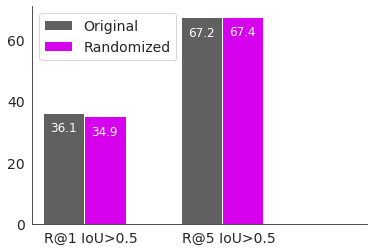

In [9]:
# The performances of the SCDM model when the original and randomized videos are fed to the model
def display_score(bar, color="w"):
    plt.text(
        bar.get_x()+bar.get_width()*.5,
        bar.get_height()-6,
        f"{bar.get_height():.1f}",
        horizontalalignment="center",
        fontsize=12,
        color=color
    )
    
def plot_performance_comparison(sum_a, sum_b, labels):
    plt.figure(figsize=(6, 4))
    c = ["#606060", "#d602ee"]
    keys = [f"R@{k} IoU>0.5" for k in [1, 5]]
    x = np.arange(2)+0.2
    for score_summary, l in zip([sum_a, sum_b], labels):
        vals = [score_summary[k] * 100 for k in keys]
        bars = plt.bar(x, vals, width=0.3, color=c.pop(0), label=l)
        for b in bars:
            display_score(b, color="w")
        x += 0.3

    plt.xticks(ticks=np.arange(3)+0.4, labels=keys, ha="center")
    plt.legend()
    sns.despine(left=False)

plot_performance_comparison(summary, randomized_summary, labels = ["Original", "Randomized"])

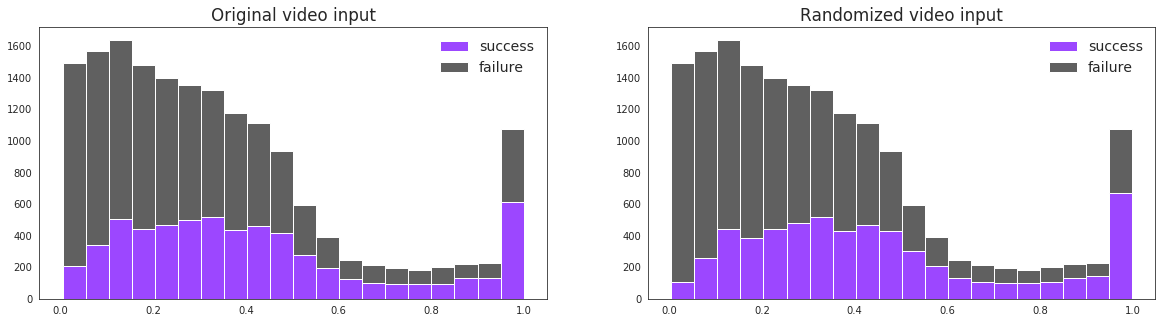

In [7]:
# Check relation between success rates and iput video durations
def plot_comparison_per_duration(results, titles, data):
    f, axes = plt.subplots(1, len(results), figsize=(20, 5))
    plt.rcParams.update({'font.size': 14})
    
    for ax, res, t in zip(axes, results, titles):
        _ = plot_performance_per_duration(res, data, ax=ax)
        ax.set_title(t)


plot_comparison_per_duration(
    (results, randomized_results), 
    ["Original video input", "Randomized video input"],
    test_data)